In [8]:
# ipython magic
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [9]:


# plot configuration
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
# import seaborn as sns # sets another style
matplotlib.rcParams['lines.linewidth'] = 3

# font = {'family' : 'sans-serif',
#         'weight' : 'normal',
#         'size'   : 18.0}
# matplotlib.rc('font', **font)  # pass in the font dict as kwar

In [10]:
# Imports and definitions
from sympy import *
from sympy.stats import  Normal, density
init_printing(use_latex='mathjax')
from IPython.display import display;

x1,x2,y =symbols("x1,x2,y")

# Conditional variance as a means to quantify uncertainty and sensitivity


## Recap of basic statistics

Inspired by [Rachel Fewster's presentation](https://www.stat.auckland.ac.nz/~fewster/325/notes/ch3.pdf)
### Expectation

The mean, expected value, or expectation of a random variable $X$ is
written $E(X)$ or sometimes $\mu_X$. When it is assumed to be clear
from the context which random varialbe it pertains to, the supscript
of the expectation may by dropped, i.e. $E(X)=\mu$.  The meaning of
$E(X)$ is that if we observe $N$ random values of $X$, the mean of
these $N$ values will be approximately equal to $E(X)$ for large
values of $N$ .

<!-- Equation labels as ordinary links -->
<div id="eq:definition"></div>

$$
\begin{equation}
E(X) \equiv \mu = {\int\limits}_{x_{\text{min}}}^{x_{\text{max}}} x \; p(x) \, dx 
 \tag{1}
\end{equation}
$$

where $p(x)$ is the [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (pdf) of
for the random variable $X$.

With [sympy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) we may compute
the analytical expectation of a normal distribution easily. Random
variables may be declared by means of ready made functions like
`Normal, Exponential`,etc. A corresponding probability density
function may declared with the `density` function. The expectation
$E(X) = \mu$ may then be computed analyticaly by following the
definition in ([eq:definition](#eq:definition)):

<!-- In the case in which $X$ have a "normal distribution": -->
<!-- "https://en.wikipedia.org/wiki/Normal_distribution", the expectation -->
<!-- may be computed analytically (with sympy) with the following snippet: -->

<!-- You may experiment with different values of the mean value set by the -->
<!-- variable `m` in the snippet, to see that the true expectation is -->
<!-- returned from the analytical integration. -->

In [11]:
# Expectation of a normally distributed variable 
mu1 = symbols("mu1", positive=True)
V1 = symbols("sigma1", positive=True)
X1 = Normal("X", mu1, V1)
D1 = density(X1)(x1)
E1=Integral(x1*D1,(x1,-oo,oo))
display(Eq(E1,E1.doit()))   # use doit to evaluate an unevaluated integral

∞                                 
⌠                                 
⎮                    2            
⎮         -(-μ₁ + x₁)             
⎮         ─────────────           
⎮                 2               
⎮             2⋅σ₁                
⎮  √2⋅x₁⋅ℯ                        
⎮  ──────────────────── d(x₁) = μ₁
⎮        2⋅√π⋅σ₁                  
⌡                                 
-∞                                

In our snippet above the random variable $Z$ is normally distributed with variance `mu1` and variance `V1` (rendered $\mu_1$ and $\sigma^2$ repsectively, with mathjax). 

We observe that when we carry out the integration
`E1=Integral(x1*D1,(x1,-oo,oo))` the expectation $\mu_1$ is returned
as it should.

### Variance

The variance $V(X)$ is introduced to quantify "how much" the samples
of the random variable $X$ varies around the mean $E(X)$:

<!-- Equation labels as ordinary links -->
<div id="eq:var_def"></div>

$$
\begin{equation}
V(X) \equiv \sigma_X^2 =  E \left [\left ( X - E(X) \right )^2 \right ] 
 \tag{2}
\end{equation}
$$

The variance for our random variable `Z` in the code snippet above may also computed from the definition in ([eq:var_def](#eq:var_def)):

In [12]:
# Compute the variance analytically
V = Integral((x1-E1.doit())**2*D1, (x1,-oo,oo))
display(Eq(V,V.doit()))

∞                                           
⌠                                           
⎮                             2             
⎮                  -(-μ₁ + x₁)              
⎮                  ─────────────            
⎮                          2                
⎮               2      2⋅σ₁                 
⎮  √2⋅(-μ₁ + x₁) ⋅ℯ                        2
⎮  ───────────────────────────── d(x₁) = σ₁ 
⎮             2⋅√π⋅σ₁                       
⌡                                           
-∞                                          

A common way of denoting the variance of $X$ is also
$V(X)=\sigma_X^2$.  For later use we observe that from
([eq:var_def](#eq:var_def)) we may deduce the commonly used relations:

<!-- Equation labels as ordinary links -->
<div id="eq:Vx"></div>

$$
\begin{equation}
V(X) = E \left [\left ( X - E(X) \right )^2 \right ] = E[X^2] -2 \; E\left[X\, E[X] \right ] + E^2[X]= E[X^2] -  E^2[X]
 \tag{3}
\end{equation}
$$

and thus:

<!-- Equation labels as ordinary links -->
<div id="eq:Exsq"></div>

$$
\begin{equation}
 E[X^2] = V(X) +  E^2[X]
 \tag{4}
\end{equation}
$$

### Conditional probability density functions and expectation

**Joint probability density functions:**

Suppose that $X_1, X_2, \ldots$ are random varibles, possibly
dependent on each other, then their [joint probability density
function](https://en.wikipedia.org/wiki/Joint_probability_distribution), (jpdf) 
expresses the probability that each variable falls within the range
specificed for that particular variable. In the case of two random
variables, the joint probability distribution is normally called the
bivariate distribution.

Below we will consider the jpdfs for the input parameters of a
computational model, which we assume to be independent random
variables. We will further assume that the jpdf may simply be
represented as:

<!-- Equation labels as ordinary links -->
<div id="eq:jpdf"></div>

$$
\begin{equation}
p(x_1,x_2) = p(x_1) \, p(x_2)
 \tag{5}
\end{equation}
$$

Below we compute the expectation for a bivariate distribution:

In [13]:
# Expectation of the product of two normally distributed parameters
mu2 = symbols("mu2", positive=True)
V2 = symbols("sigma2", positive=True)
X2 = Normal("X", mu2, V2)
D2=density(X2)(x2)
jpdf=D1*D2
E2=Integral(x1*x2*jpdf,(x2,-oo,oo),(x1,-oo,oo)) 
display(Eq(E2,E2.doit())) # use doit to evaluate an unevaluated integral

∞  ∞                                                         
⌠  ⌠                                                         
⎮  ⎮                    2              2                     
⎮  ⎮         -(-μ₁ + x₁)    -(-μ₂ + x₂)                      
⎮  ⎮         ─────────────  ─────────────                    
⎮  ⎮                 2              2                        
⎮  ⎮             2⋅σ₁           2⋅σ₂                         
⎮  ⎮  x₁⋅x₂⋅ℯ             ⋅ℯ                                 
⎮  ⎮  ─────────────────────────────────── d(x₂) d(x₁) = μ₁⋅μ₂
⎮  ⎮               2⋅π⋅σ₁⋅σ₂                                 
⌡  ⌡                                                         
-∞ -∞                                                        

and we note that the expectation of the bivariate distribution is the
scalar number given (the product of the two mean values).

**Conditional pdfs:**

Suppose that $X$ and $Y$ are two random varibles, possibly dependent
on each other and that we fix $X$ at the value $x$.This situation
gives rise to a conditional pdf of $Y$ for a
given $X=x$:

<!-- Equation labels as ordinary links -->
<div id="eq:cond_pdf"></div>

$$
\begin{equation}
p(Y\; | \,X=x) = \frac{p(X,Y)}{p(X)}
 \tag{6}
\end{equation}
$$

where $p(X,Y)$ is the joint pdf. That is, whenever the joint pdf may
be represented as the product of the random variables, the conditional
pdf reduces to the marginal pdf of the variable which is not taken as
a constant. We then realize that the conditional pdf of $Y$ for a
given $X=x$ may be simplified to:

<!-- Equation labels as ordinary links -->
<div id="eq:cond_pdf_simple"></div>

$$
\begin{equation}
p(Y\; | \,X=x) = p(Y)
 \tag{7}
\end{equation}
$$

**Conditional expectation:**

Once the conditional pdfs has been introduced, the conditional
expectation $E(Y\; | \,X=x)$ has natural formulation following from the
definition in ([eq:definition](#eq:definition)):

<!-- Equation labels as ordinary links -->
<div id="eq:conditionalE"></div>

$$
\begin{equation}
E(Y\; | \,X=x) = {\int\limits}_{y_{\text{min}}}^{y_{\text{max}}} y \; p(y\; | \,X=x) \, dy = f(x)
 \tag{8}
\end{equation}
$$

**Conditional expectation as a random variable:**

However, the conditional expectation, $E(Y \;|\, X=x)$ is a number
depending on $x$, and therefore the value of $x$ will also
influence the mean or expectation of $Y$.
The normal, unconditional expectation $E(X)$ of a random variable $X$, is just a number.

                  2 
       -(-μ₁ + x₁)  
       ─────────────
               2    
           2⋅σ₁     
√2⋅μ₂⋅ℯ             
────────────────────
      2⋅√π⋅σ₁       

<IPython.core.display.Javascript object>


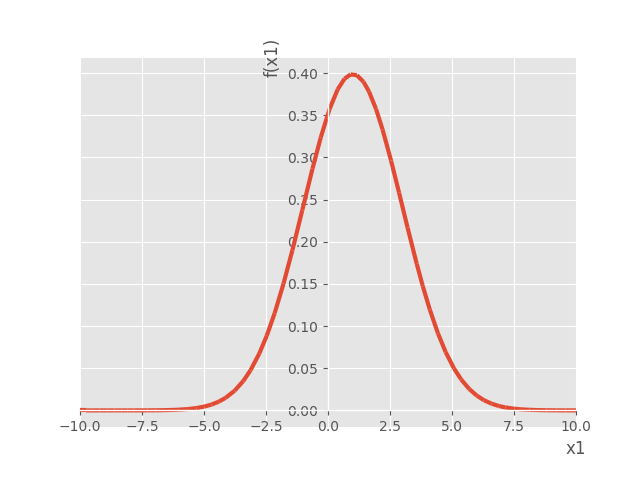

In [14]:
# Conditional expectation
E_given_x1=Integral(x2*jpdf,(x2,-oo,oo)) 
display(E_given_x1.doit())

from sympy.plotting import plot
mu1_value=1
V1_value=2
mu2_value=2
V2_value=1

Ex=E_given_x1.subs([(V1,V1_value),(mu2,mu2_value),(mu1,mu1_value)]).doit()
_=plot(Ex,(x1,-10,10))

⎛                                                                             
⎜                                                                             
⎜                   2                 2                    2                 2
⎜               2⋅μ₁  + 2⋅μ₁⋅x₁ + 2⋅x₁                 3⋅μ₁  + 6⋅μ₁⋅x₁ + 3⋅x₁ 
⎜               ───────────────────────                ───────────────────────
⎜                           2                                       2         
⎜     2   2               σ₁                  3/2   2           2⋅σ₁          
⎝- 4⋅π ⋅μ₂ ⋅σ₁⋅ℯ                        + √2⋅π   ⋅μ₂ ⋅ℯ                       
──────────────────────────────────────────────────────────────────────────────
                                                                         3   3
                                                                      4⋅π ⋅σ₁ 

                                  2               2⎞                 
                              5⋅μ₁            5⋅x₁ ⎟        

                     2                       2                  2 
          3⋅x₁  -3⋅x₁                 x₁  -x₁            x₁  -x₁  
          ────  ───────               ──  ─────          ──  ─────
    -3/8   4       8            -1/8  4     8      -1/4  2     4  
√2⋅ℯ    ⋅ℯ    ⋅ℯ          5⋅√2⋅ℯ    ⋅ℯ  ⋅ℯ        ℯ    ⋅ℯ  ⋅ℯ     
─────────────────────── + ───────────────────── - ────────────────
            3/2                    4⋅√π                  π        
         8⋅π                                                      

<IPython.core.display.Javascript object>


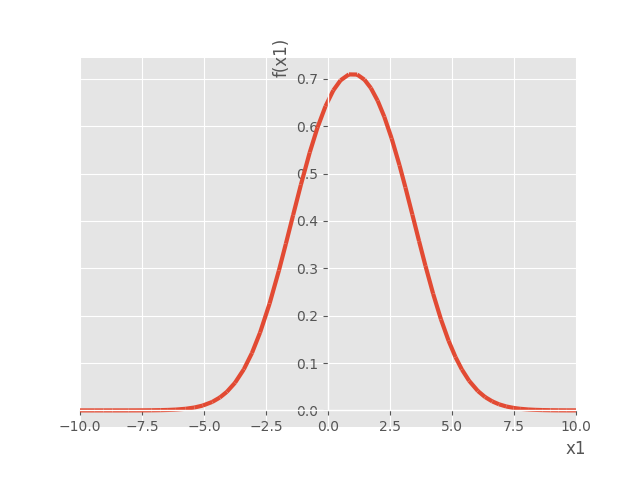

In [15]:
# Compute the conditional variance analytically
V_given_x1=Integral((x2-E_given_x1.doit())**2*jpdf,(x2,-oo,oo))
display(simplify(V_given_x1.doit())) 
Vx=V_given_x1.subs([(mu1,mu1_value),(V1,V1_value),(mu2,mu2_value),(V2,V2_value)]).doit()
display(Vx)
_=plot(Vx,(x1,-10,10))

<!-- @@@CODE ./preliminaries.py fromto:# Analytical expectation from normal distribution@# Compute the variance analytically -->

<!-- @@@CODE ./preliminaries.py fromto:# Compute the variance analytically@# Conditional expectation -->

<!-- @@@CODE ./preliminaries.py fromto:# Conditional expectation@# Compute the conditional variance analytically -->



<!-- @@@CODE ./preliminaries.py fromto:# Compute the conditional variance analytically@ -->





### Adam and Eve and their statistical relation

For two integrable random variables $X$ and $Y$ Adam's and Eve's laws are formulated below.

**Adam's Law of total expectation:**


[Adam's law](https://en.wikipedia.org/wiki/Law_of_total_expectation) of
total expectation may be stated as (follow the hyperlink for more details
and proof):

<!-- Equation labels as ordinary links -->
<div id="eq:Adam"></div>

$$
\begin{equation}
E[Y] = E[E[Y\; | \,X]]
 \tag{9}
\end{equation}
$$

the law is also known as law of iterated expectations, the tower rule, the smoothing theorem.

To make it more clear over which variables the expectation operators are applied to we may present Adams's law as:

<!-- Equation labels as ordinary links -->
<div id="eq:Adam_explained"></div>

$$
\begin{equation}
E[Y] = E_X \, [E_{Y|X}[Y\; | \,X]]
 \tag{10}
\end{equation}
$$

A short proof:

<!-- Equation labels as ordinary links -->
<div id="eq:Adam_proof"></div>

$$
\begin{equation}
E[Y] = \int_x  E[Y\; | \,X] \; p(x) dx = \int_x  \int_y y \; p(y \,| X=x) \; dy \; p(x) dx = \int_x  \int_y y \, p(x,y)  \; dy \, dx =  \int_y y \, p(y)  \; dy 
 \tag{11}
\end{equation}
$$

An alternative proof for the discrete case may be found on [YouTube](https://www.youtube.com/watch?v=Ki2HpTCPwhM)


**Eve's Law of total variance:**

The somewhat related [Eve's law](https://en.wikipedia.org/wiki/Law_of_total_variance), which we will
refer to as the *law of total variance* may be represented as:

<!-- Equation labels as ordinary links -->
<div id="eq:Eve"></div>

$$
\begin{equation}
V(Y) = V(E(Y\; | \,X)) + E(V(Y\; | \,X)) 
 \tag{12}
\end{equation}
$$

# Generalizations to a computational model with $k$ uncorrelated parameters
We consider a mathematical/computational model $f$ which produces an output $y$ as a function of $k$ uncorrelated parameters $x_1, x_2, \ldots, x_k$:

<!-- Equation labels as ordinary links -->
<div id="eq:model"></div>

$$
\begin{equation}
 y = f(x_1, x_2, \ldots, x_k)
 \tag{13}
\end{equation}
$$

### Condtional variance for our computational model

Given that our computational model $f(x_1, x_2, \ldots, x_k)$ takes
$x_1, x_2, \ldots, x_k$ are $k$ independent random parameters with
marginal pdfs $p_i(x_i)$, a joint probability
density function may be constructed:

$$
\begin{equation}
P(x_1, x_2, \ldots, x_k) = \prod_{i=1}^k p_i(x_i)

\end{equation}
$$

As the parameters of our model are random parameters, the predicted
values $y$ will be random too, with the following statistical moments:

**Expected value $E(y)=\mu$:**

$$
\begin{equation}
\mu=E(y)=\idotsint f(x_1, x_2, \ldots, x_k)\; \prod_{i=1}^k p_i(x_i) \, \; \mbox{dx}_i

\end{equation}
$$

**Variance $V(y)=\sigma_y^2$:**

$$
V(y)  = \idotsint \left (f(x_1, x_2, \ldots, x_k) -E(y) \right )^2\;\prod_{i=1}^k p_i(x_i) \, \; \mbox{dx}_i \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="eq:VarDef"></div>

$$
\begin{equation} 
  =  \tag{14}
\end{equation}
$$

where the latter equivalence may be deduced following the same lines of deduction as for ([eq:Vx](#eq:Vx)).

$$
\begin{align*}
V(y\; | \,x_j = \tilde{x}_j) & = \idotsint \left (f(x_1, x_2, \ldots, \tilde{x}_j,\ldots, x_k) -E(y\; | \,x_j = \tilde{x}_j) \right )^2\;\prod_{i=1 \atop i\neq j}^k p_i(x_i) \, \; \mbox{dx}_i \\
 & = \idotsint f(x_1, x_2, \ldots, \tilde{x}_j, x_k)^2\; \prod_{i=1\atop i\neq j}^k p_i(x_i)\, \; \mbox{dx}_i -E^2(y\; | \,x_j = \tilde{x}_j) 

\end{align*}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:EVarCondz"></div>

$$
\begin{equation}
E \tag{15}
\end{equation}
$$

The [The Law of Total Variance](https://en.wikipedia.org/wiki/Law_of_total_variance) (also known as
`Eve's Law`) can be presented as:

<!-- Equation labels as ordinary links -->
<div id="eq:VarCond"></div>

$$
\begin{equation}
V\left ( E(y\; | \,x_j ) \right ) = V(y) - E\left ( V(y\; | \,x_j ) \right ) 
 \tag{16}
\end{equation}
$$

By subtraction of ([eq:EVarCondz](#eq:EVarCondz)) from ([eq:VarDef](#eq:VarDef)) we realize
from ([eq:VarCond](#eq:VarCond)) that `Eve's Law` also may be represented:

<!-- Equation labels as ordinary links -->
<div id="eq:VarCondII"></div>

$$
\begin{equation}
V \left ( E(y\; | \,x_j ) \right ) = \int E^2(y\; | \,x_j = \tilde{x}_j) \; p_j(\tilde{x}_j) \; d \tilde{x}_j  -E^2(y)
 \tag{17}
\end{equation}
$$